# Task 1: Prediction using Supervised ML
#### - Ankita Priya

## Problem Approach
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [8]:
# Import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Import the dataset

path = "http://bit.ly/w-data"
data = pd.read_csv(path)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Visualising Data

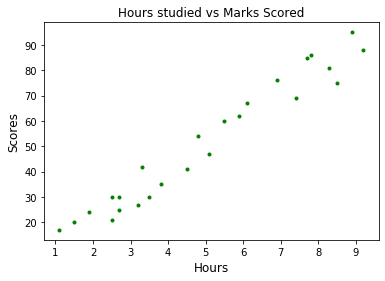

In [14]:
# Plotting a scatter plot

plt.xlabel('Hours', fontsize = 12)
plt.ylabel('Scores', fontsize = 12)
plt.title('Hours studied vs Marks Scored', fontsize = 12)
plt.scatter(data.Hours, data.Scores, color = 'green', marker = '.')
plt.show()

The scatter plot shows us a positive linear relation between number of hours studied and marks scored (in percentage).

## Data Preprocessing

Here we divide data into "attributes" (inputs) and "labels" (outputs).

In [16]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Preparing the data and splitting into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [19]:
# Splitting data using 80:20 rule (PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


## Training our model

In [21]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [22]:
# Fitting training data

linreg.fit(X_train,Y_train)
print("Training completed.")

Training completed.


## Plotting the Line of Regression
Now since our model is trained now, its the time to visualize the best-fit line of regression.

In [28]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)## β0 is Intercept & Slope of the line is β1.,"

B0 = 2.018160041434683 
B1 = [9.91065648]


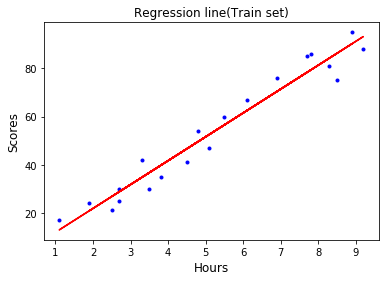

In [34]:
# Plotting the regression line
Y0 = linreg.coef_*X_train + linreg.intercept_

# Plotting on train data
plt.scatter(X_train,Y_train,color='blue',marker='.')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=12)
plt.ylabel("Scores",fontsize=12)
plt.title("Regression line(Train set)",fontsize=12)
plt.show()

## Making Predictions

Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [45]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [35]:
# Predicting scores for test data

Y_pred=linreg.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [36]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

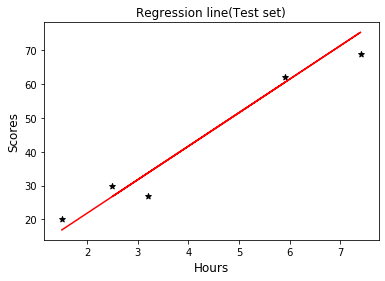

In [37]:
# Plotting line on test data

plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='*')
plt.xlabel("Hours",fontsize=12)
plt.ylabel("Scores",fontsize=12)
plt.title("Regression line(Test set)",fontsize=12)
plt.show()

## Comparing Actual result to the Predicted Model result

In [40]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Predicted Value':prediction})
df_compare

,Actual,Predicted Value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Accuracy of the model

In [47]:
from sklearn import metrics

In [55]:
# Estimating training and test score

print("Training Score:",linreg.score(X_train,Y_train))
print("Test Score:",metrics.r2_score(Y_test,Y_pred))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105356


Above 94% percentage indicates that above fitted model is a GOOD MODEL.

In [58]:
# Testing the model with our own data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = linreg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Predicting errors

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [60]:
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  21.5987693072174
Root Mean Squared Error =  4.6474476121003665
Mean Absolute Error     =  4.6474476121003665


## Conclusion 

From the results obtained, we can say that if a student studied for 9.25 